In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('^CNXIT.csv')
df.drop(['Adj Close'], axis=1, inplace=True)
df = df.sort_values(by='Date')

for i in range(1, 6):
    df[f'CloseLag_{i}'] = df['Close'].shift(i)

df = df.dropna()

df

,Date,Open,High,Low,Close,Volume,CloseLag_1,CloseLag_2,CloseLag_3,CloseLag_4,CloseLag_5
5,2017-01-10,10232.549805,10255.849609,10184.349609,10221.500000,0.0,10198.450195,10110.450195,10400.049805,10496.900391,10362.250000
6,2017-01-11,10238.049805,10282.200195,10154.500000,10220.549805,0.0,10221.500000,10198.450195,10110.450195,10400.049805,10496.900391
7,2017-01-12,10237.450195,10410.799805,10236.000000,10398.799805,0.0,10220.549805,10221.500000,10198.450195,10110.450195,10400.049805
8,2017-01-13,10504.049805,10551.400391,10217.450195,10263.549805,0.0,10398.799805,10220.549805,10221.500000,10198.450195,10110.450195
9,2017-01-16,10223.049805,10223.049805,10137.000000,10173.099609,0.0,10263.549805,10398.799805,10220.549805,10221.500000,10198.450195
...,...,...,...,...,...,...,...,...,...,...,...
1704,2023-11-24,32341.000000,32420.449219,32010.000000,32055.150391,11800.0,32370.650391,32564.400391,32325.699219,32383.199219,32191.349609
1705,2023-11-28,32115.849609,32187.949219,31807.849609,32118.500000,14300.0,32055.150391,32370.650391,32564.400391,32325.699219,32383.199219
1706,2023-11-29,32258.500000,32633.000000,32248.349609,32608.400391,18800.0,32118.500000,32055.150391,32370.650391,32564.400391,32325.699219
1707,2023-11-30,32569.800781,32701.650391,32455.300781,32582.199219,39500.0,32608.400391,32118.500000,32055.150391,32370.650391,32564.400391


In [53]:
features = ['Open', 'High', 'Low', 'Volume'] + [f'CloseLag_{i}' for i in range(1, 6)]
x = df[features]
y = df['Close']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=11)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=11)

In [55]:
predictions = model.predict(x_test)
testPredictions = model.predict(x_train);

In [56]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 30480.659734002726


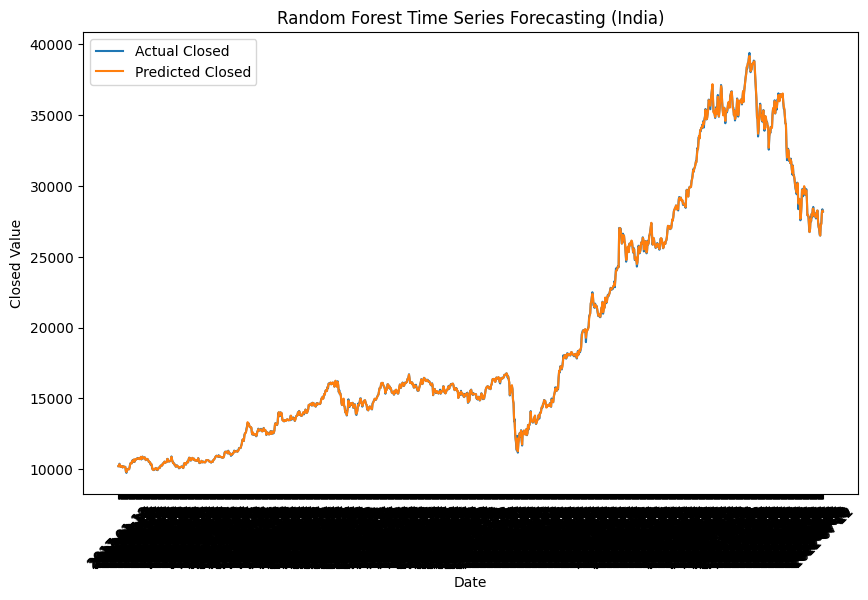

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][:-len(y_test)], y_train, label='Actual Closed')
plt.plot(df['Date'][:-len(y_test)], testPredictions, label='Predicted Closed')
plt.title('Random Forest Time Series Forecasting (India)')
plt.xlabel('Date')
plt.xticks(df['Date'][:-len(y_test)], rotation=45)
plt.ylabel('Closed Value')
plt.legend()
plt.show()

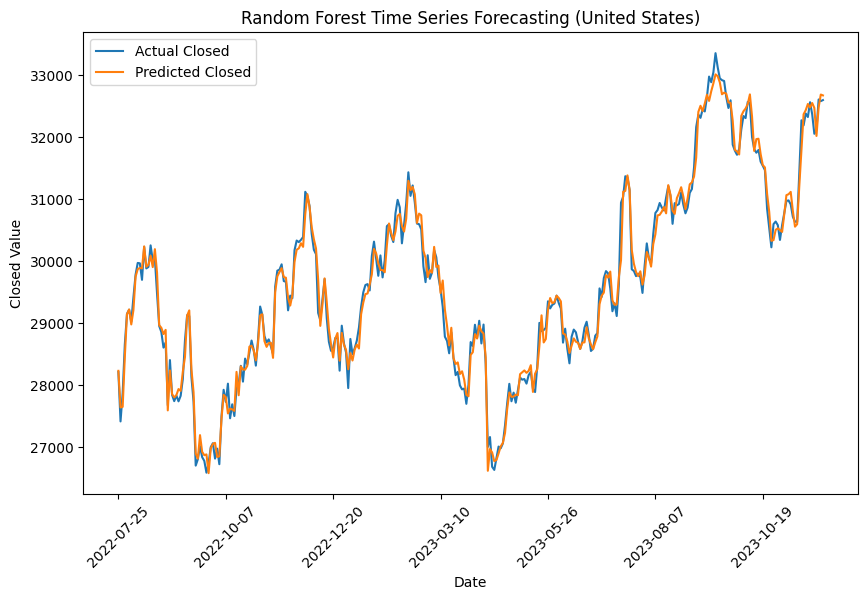

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][-len(y_test):], y_test, label='Actual Closed')
plt.plot(df['Date'][-len(y_test):], predictions, label='Predicted Closed')
plt.title('Random Forest Time Series Forecasting (United States)')
plt.xlabel('Date')
plt.xticks(df['Date'][-len(y_test)::50], rotation=45)
plt.ylabel('Closed Value')
plt.legend()
plt.show()

model.fit(x.y)